# Ultimate Challenge

## Part I -- Exploratory Data Analysis

After loading the data from the json file, I transformed the data into a datetime type and then aggregated the login times into 15 minute intervals and counted the numbers of logins occuring over these 15 minute intervals. I then obeserved when the maximum (73) and minimum (0) numbers of logins occurred.  

I then plotted the counts of the aggregated results.  There did not appear to be an obvious pattern, so I also plotted the first and last days of the data below (96 15 minute intervals in a day). There also did not appear to be an obvious pattern.  

To verify whether there is any kind of pattern to be found in the data, I plotted the autocorrelation function, first over the data itself, then over the differenced data (intervals between data points).  

There did appear to be significant autocorrelation on the data itself over smaller lags that quickly diminished as the lag increased.  This could perhaps account for the small noontime pattern observed in the daily data.  However, the autocorrelation plot on the differenced data revealed only white noise.  Therefore, the numbers of logins at one time have no impact on the numbers of logins at a later time and the data is largely random.  

## Part II -- Experiment and Metric Design

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

I would look to the number of fares served by formerly Gotham-exclusive drivers during daytime hours and the number of fares served by formerly Metropolis-exclusive drivers during nighttime hours on weekdays.  If these numbers increase during the experiment, it is likely that the drivers have taken advantage of the toll reimbursement to travel to the opposite city and gain additional business.  This would be a useful metric to evaluate whether the business has truly benefitted from the toll reimbursement because Metropolis citizens are active only during the day and Gothm citizens are active only at night.  

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

   a. how you will implement the experiment
   
   b. what statistical test(s) you will conduct to verify the significance of the observation
   
   c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.


a. I would look at the average number of fares taken in on weekdays over a one month period at nighttime for Metropolis drivers and during daytime hours for Gotham drivers where no toll reimbursement was in effect, then at the same figures over another month-long period where the toll reimbursement was in place and compare the two results.  

b.  I would use a chi-squared test on the two variables, average fares taken in and whether or not toll reimbursements are in effect (a binary variable), to determine whether or not they are independent.  The null hypothesis is that they are independent.  

c. If the p-value obtained as a result of the chi-squared test is less than 0.05 this indicates that the probability that the two variables are independent is less than 0.05 and the null hypothesis can be rejected. Therefore, the toll reimbursement has a definite effect on the average number of fares. If the average number of fares during nighttime hours for Metropolis drivers and during daytime hours for Gotham drivers is greater when toll reimbursement is in effect, and the p-value for this to occur is less than 0.05, then the effect of the toll reimbursement is both positive and significant. Assuming this to be the case, I would encourage the city operations team to reimburse the drivers' tolls.  However, if the results were positive but either small or not significant (thus indicating that they may have been due to chance), I would not encourage them to reimburse the tolls, as it would not be worth it to the cities to do this.  

## Part III -- Predictive Modeling

### Data Cleaning

I began by loading the json data into a dataframe and examining whether there were any missing/null values.  Three variables had null values:  avg_rating_by_driver, avg_rating_of_driver and phone.  I filled in the null values in the first two variables with the mean average ratings for each.  The null value in phone was simply 'None', which is techinically a legitimate value (some individuals may simply have no phone).  In this instance I simply changed the null value'None' to the string 'None'.  All null values were then eliminated from the dataset.  

I then checked the type of the two date variables and determined that they were stings.  I then transformed them both to datetime types so date and time data could be properly extracted from them.

### Exploratory Data Analysis

To gain greater insights into what elements may contribute to users being retained or not, I split the dataset into two based on whether the variable 'ultimate_black_user' was True or False: retained_users and not_retained_users. The total percentage of retained users was 37.7%, but only 0.55% of retained users were still active after 6 months (i.e., in July; all users signed up in the month of January), while just 1.10% of all users were active in July.  

I then plotted all of the numerical variables in the overall dataset against one another in pairs noting whether each data point pertained to an ultimate_black user.  Generally, data for both types of user aligned except in some instances.  The average ratings of and by drivers were generally lower compared to other variables for not retained users.  Additionally, fewer not retained users took trips in the first 30 days.

I then plotted the counts for the categorical variables.  The greatest numbers of people were in Winterfell, but a greater proportion of the total number of people in King's Landing were retained users relative to those who were not.  

Most individuals (retained and otherwise) were also iPhone users, but a greater number of individuals with no phone were retained users.  

I then plotted the distributions of each numerical variable for both retained and not retained users.  Most distributions for each numerical variable are the same for both retained and not retained. More retained users have lower surge levels (lower percentage of trips taken with a multiplier). More retained users took trips in the first 30 days. Greater numbers of not retained users do all (100%) or none (0%) of their traveling on weekdays. 20% to 85% of weekday travel is most common for retained users. 

I then analyzed the numbers and proportions of retained and not retained users that last traveled in a particular month.  Most traveled in June for both retained and not retained users, but a far greater percentage of retained users traveled in June than in any other month. Therefore this may still be a good month to look at as a time for greater efforts at retainining users, since there is such a large drop-off in travel in July.  

I then performed a similar analysis of signup times, but looking at days of the week rather than months, since all signups were in the month of January.  Fridays (5) and Saturdays (6) were the most common signup days for both groups of users (retained and not retained), with slightly more retained users signing up on Fridays. All values for both types of users were also very close, so ultimately the timing of the signups may not matter.  

### Machine Learning

#### Feature Engineering

Next, I prepared the data for machine learning.  First I created a features dataset, dropping the signup_date and avg_surge columns (avg_surge being too highly correlated with the surge percent variable).  I then scaled the numeric variables by subtracting their mean and dividing by the population standard deviation. 

Then, I created a month variable to indicate the month in which the last trip was taken.  From this column another binary column was taken to indicate whether or not the last month was in July (6 months out).  This variable 'target' was then separated out from the features dataframe to become the target variable.  I also created dummy variables for the city and phone categorical variables.  

Then, I created a month variable to indicate the month in which the last trip was taken.  From this column another binary column was taken to indicate whether or not the last month was in July (6 months out).  This variable 'target' was then separated out from the features dataframe to become the target variable.  I also created dummy variables for the city and phone categorical variables. Finally, I split the data into training and test sets using an 80%-20% split.

#### Logistic Regression

I initially attempted to use a logistic regression model, but due to the imbalanced data (548 1's compared to 49452 0's in the target variable), the model only predicted the zero values.  The accuracy on the test data was over 99%, but the individual recall on the 1's was zero.  This model was therefore rejected.  

#### Random Forest

I then attempted to use a random forest model in the hopes that the random ensembling may help compensate for the imbalanced data, as I did not wish to attempt oversampling since that effectively alters the dataset itself.  However, I got similar results as I got for the logistic regression model:  a model that only successfully predicts zero values in the target variable.  I therefore rejected the random forest model as well. 

#### Support Vector Machine

Finally, I attempted to use a support vector machine classifier since I knew that it could weight the data in a balanced way to set class weights inversely proportional to class frequencies, as did the random forest model, but it also uses a penalty term C with the class weights.  This provided more realistic results.  Initially I got an accuracy of 70% and ultimately obtained an accuracy of 71.47% by increasing the C value to 3.  

Although the precision for the positive target class was still low (a lot of false positive predictions were apparently being made), the recall for the positive target class was substantially higher at .72, thus showing a much higher level of prediction for the positive target class out of the total number of actual postives present.  I therefore considered this model to be successful given the imbalanced data and deemed oversampling to be unnecessary here.  

Finally, solely for the purpose of identifying the most important features, I re-ran the same model using a linear kernel which gives access to the feature coefficients.  The most important feature was city_King's Landing, followed by phone/i_Phone use, city_Winterfell, weekday_pct and trips_in_first_30_days. Avg_dist had a strong inverse level of importance as well.  

### Conclusion

Based on the foregoing, it therefore appears that King's Landing, and to a lesser extent Winterfell, are the best cities to target for long term customer retention.  Both iPhone users and those with no phone should also be targeted.  Although the percentage of trips taken during a weekday is an important predictive factor in determining long term activity, this percentage should be in the key range of approximately 20%-85% of weekday travel.  Those who travel more or less than this period of time during the week were typically not enthusiastic adopters who took Ultimate Black trips within the first 30 days of signing up.  Finally, it appears that those who traveled shorter distances were more likely to be long term users.  

Therefore one possible strategy would be to focus more on marketing toward these types of users.  Conversely, another possible (perhaps more challenging) strategy would be to increase outreach efforts toward those individuals not in these categories in order to increase retention numbers among them.  

## Part I -- Exploratory Data Analysis

After loading the data from the json file, I transformed the data into a datetime type and then aggregated the login times into 15 minute intervals and counted the numbers of logins occuring over these 15 minute intervals. I then obeserved when the maximum (73) and minimum (0) numbers of logins occurred.  

In [1]:
import numpy as np
import pandas as pd

#Read in json as dataframe
logins = pd.read_json('logins.json')

#No nulls, all of type datetime, so no need to convert
logins.info()
logins.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [2]:
#Change to DateTime index for aggregation
logins = logins.set_index(pd.DatetimeIndex(logins['login_time']))

In [3]:
logins = logins.resample('15T').count()


In [4]:
logins.columns = ['Count']
logins = logins.reset_index(level='login_time')
logins.head()

,login_time,Count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [5]:
logins[logins['Count'] == max(logins['Count'])]

,login_time,Count
5602,1970-03-01 04:30:00,73


In [6]:
logins[logins['Count'] == min(logins['Count'])]

,login_time,Count
6,1970-01-01 21:30:00,0
33,1970-01-02 04:15:00,0
41,1970-01-02 06:15:00,0
88,1970-01-02 18:00:00,0
147,1970-01-03 08:45:00,0
152,1970-01-03 10:00:00,0
153,1970-01-03 10:15:00,0
237,1970-01-04 07:15:00,0
330,1970-01-05 06:30:00,0
332,1970-01-05 07:00:00,0


I then plotted the counts of the aggregated results.  There did not appear to be an obvious pattern, so I also plotted the first and last days of the data below (96 15 minute intervals in a day). (Note:  the last number on the labels for the daily charts are the hours on a 24-hour scale.)  There also did not appear to be an obvious pattern, aside from an apparent increase in the number of logins at noon.  

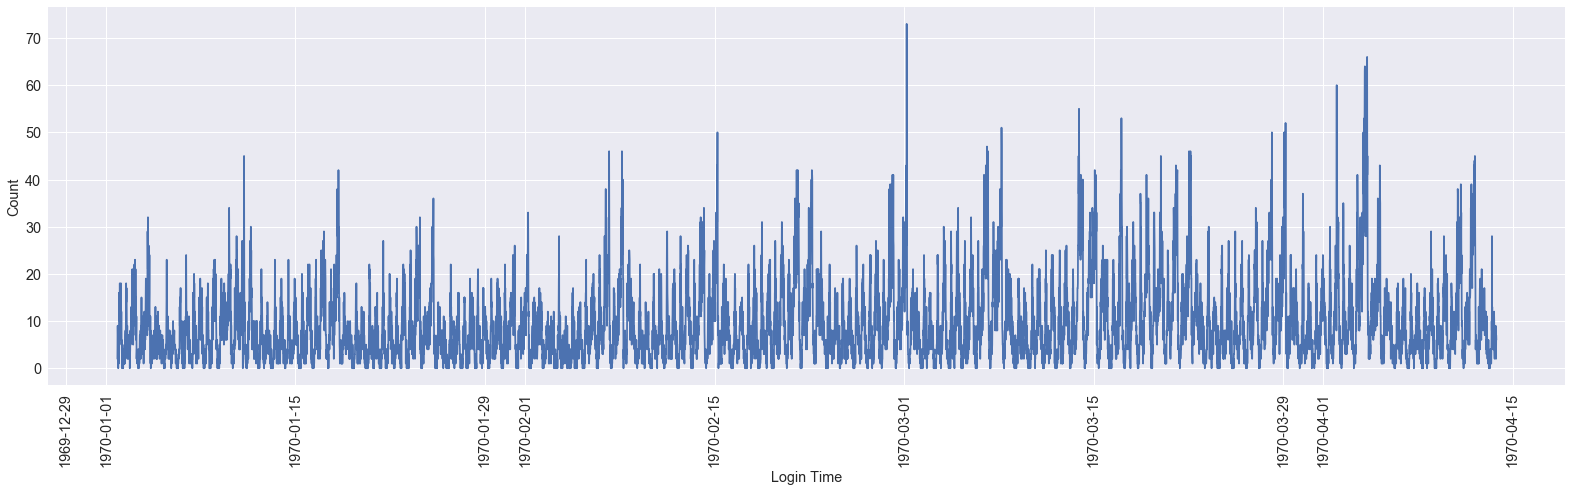

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(22, 7)
ax.plot(logins['login_time'], logins['Count'])
ax.set_xlabel('Login Time', size='large')
ax.xaxis.set_tick_params(rotation=90, labelsize='large')
ax.set_xticklabels(logins['login_time'], minor=True)
ax.set_ylabel('Count', size='large')
ax.yaxis.set_tick_params(labelsize='large')
plt.tight_layout()
plt.show()


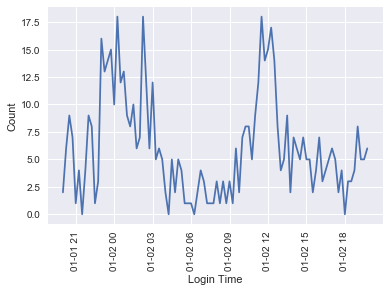

In [8]:
#Focus on first day--xticks are at 3 hour intervals here
fig, ax = plt.subplots()

ax.plot(logins['login_time'][0:96], logins['Count'][0:96])
ax.set_xlabel('Login Time')
ax.xaxis.set_tick_params(rotation=90)
ax.set_xticklabels(logins['login_time'][0:96], minor=True)

ax.set_ylabel('Count')

plt.show()


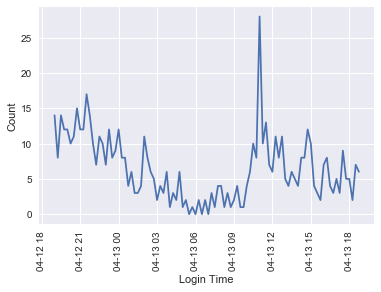

In [9]:
#Focus on last day--xticks are at 3 hour intervals here
#This does not resemble first day--numbers of logins appear to be random aside from an apparent
#increase at noon on both days
fig, ax = plt.subplots()
ax.plot(logins['login_time'][-96:], logins['Count'][-96:])
ax.set_xlabel('Login Time')
ax.xaxis.set_tick_params(rotation=90)
ax.set_xticklabels(logins['login_time'][-96:], minor=True)
ax.set_ylabel('Count')
plt.show()



To verify whether there is any kind of pattern to be found in the data, I plotted the autocorrelation function, first over the data itself, then over the differenced data (intervals between data points).  

There did appear to be significant autocorrelation on the data itself over smaller lags that quickly diminished as the lag increased.  This could perhaps account for the small noontime pattern observed in the daily data.  However, the autocorrelation plot on the differenced data revealed only white noise.  Therefore, the numbers of logins at one time have no impact on the numbers of logins at a later time and the data is largely random.  

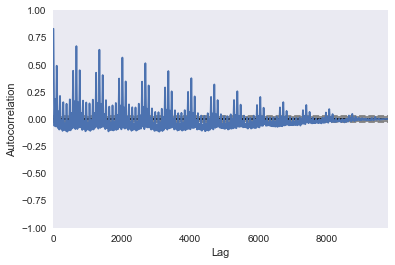

In [10]:
#Autocorrelations appear mostly nonrandom at first glance for smaller lags
from pandas.plotting import autocorrelation_plot

plt.figure()
autocorrelation_plot(logins['Count'])
plt.show()

In [11]:
#Check differences in numbers of logins for autocorrelation

log_diffs = logins['Count'].diff()

log_diffs.head()

0    NaN
1    4.0
2    3.0
3   -2.0
4   -6.0
Name: Count, dtype: float64

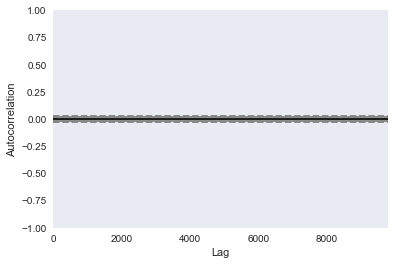

In [12]:
#Differences are not autocorrelated--appearance of white noise
plt.figure()
autocorrelation_plot(log_diffs)
plt.show()

## Part II -- Experiment and Metric Design



1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

I would look to the number of fares served by formerly Gotham-exclusive drivers during daytime hours and the number of fares served by formerly Metropolis-exclusive drivers during nighttime hours on weekdays.  If these numbers increase during the experiment, it is likely that the drivers have taken advantage of the toll reimbursement to travel to the opposite city and gain additional business.  This would be a useful metric to evaluate whether the business has truly benefitted from the toll reimbursement because Metropolis citizens are active only during the day and Gothm citizens are active only at night.  

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

   a. how you will implement the experiment
   
   b. what statistical test(s) you will conduct to verify the significance of the observation
   
   c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.


a. I would look at the average number of fares taken in on weekdays over a one month period at nighttime for Metropolis drivers and during daytime hours for Gotham drivers where no toll reimbursement was in effect, then at the same figures over another month-long period where the toll reimbursement was in place and compare the two results.  

b.  I would use a chi-squared test on the two variables, average fares taken in and whether or not toll reimbursements are in effect (a binary variable), to determine whether or not they are independent.  The null hypothesis is that they are independent.  

c. If the p-value obtained as a result of the chi-squared test is less than 0.05 this indicates that the probability that the two variables are independent is less than 0.05 and the null hypothesis can be rejected. Therefore, the toll reimbursement has a definite effect on the average number of fares. If the average number of fares during nighttime hours for Metropolis drivers and during daytime hours for Gotham drivers is greater when toll reimbursement is in effect, and the p-value for this to occur is less than 0.05, then the effect of the toll reimbursement is both positive and significant. Assuming this to be the case, I would encourage the city operations team to reimburse the drivers' tolls.  However, if the results were positive but either small or not significant (thus indicating that they may have been due to chance), I would not encourage them to reimburse the tolls, as it would not be worth it to the cities to do this.  


## Part III -- Predictive Modeling

### Data Cleaning

I began by loading the json data into a dataframe and examining whether there were any missing/null values.  Three variables had null values:  avg_rating_by_driver, avg_rating_of_driver and phone.  I filled in the null values in the first two variables with the mean average ratings for each.  The null value in phone was simply 'None', which is techinically a legitimate value (some individuals may simply have no phone).  In this instance I simply changed the null value'None' to the string 'None'.  All null values were then eliminated from the dataset.  

In [13]:
import numpy as np
import pandas as pd
import json

with open('ultimate_data_challenge.json') as f:
    data = json.load(f)

ultimate_users = pd.DataFrame(data)

ultimate_users.info()
ultimate_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [14]:
#Show number of null values in avg_rating_by_driver
print(len(ultimate_users[ultimate_users['avg_rating_by_driver'].isnull()]))

#Check mean for interpolation
np.mean(ultimate_users['avg_rating_by_driver'])

201


4.778158195947439

In [15]:
#Fill null values with average avg_rating_by_driver
ultimate_users['avg_rating_by_driver'] = ultimate_users['avg_rating_by_driver'].fillna(np.mean(ultimate_users['avg_rating_by_driver']))

#Confirm nulls eliminated
ultimate_users[ultimate_users['avg_rating_by_driver'].isnull()]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct


In [16]:
#Show number of null values in avg_rating_of_driver
print(len(ultimate_users[ultimate_users['avg_rating_of_driver'].isnull()]))

#Check mean for interpolation
np.mean(ultimate_users['avg_rating_of_driver'])

8122


4.6015592912744685

In [17]:
#Fill null values with average avg_rating_of_driver
ultimate_users['avg_rating_of_driver'] = ultimate_users['avg_rating_of_driver'].fillna(np.mean(ultimate_users['avg_rating_of_driver']))

#Confirm nulls eliminated
ultimate_users[ultimate_users['avg_rating_of_driver'].isnull()]


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct


In [18]:
#Null value for phone is "None".  This is legitimate.  Change to string value "None".  
ultimate_users[ultimate_users['phone'].isnull()]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
134,2.88,5.0,5.000000,1.00,King's Landing,2014-06-11,None,2014-01-10,0.0,0,False,100.0
176,20.32,5.0,5.000000,1.00,Astapor,2014-03-18,None,2014-01-28,0.0,0,False,100.0
320,31.01,5.0,5.000000,1.00,Astapor,2014-01-09,None,2014-01-08,0.0,1,False,100.0
349,6.03,5.0,3.300000,1.00,Winterfell,2014-06-22,None,2014-01-06,0.0,1,True,33.3
389,3.08,4.8,4.900000,1.02,King's Landing,2014-07-01,None,2014-01-26,3.0,5,False,66.7
434,5.09,4.4,4.800000,1.13,King's Landing,2014-06-25,None,2014-01-23,14.3,3,False,85.7
494,2.59,4.9,5.000000,1.03,Astapor,2014-06-10,None,2014-01-24,10.5,1,False,94.7
532,7.21,4.5,5.000000,1.06,King's Landing,2014-06-27,None,2014-01-11,7.7,0,True,51.3
534,129.89,5.0,4.601559,1.00,King's Landing,2014-03-09,None,2014-01-04,0.0,0,False,0.0
611,3.01,3.5,5.000000,1.04,Astapor,2014-03-01,None,2014-01-17,16.7,5,False,83.3


In [19]:
#Fill null values of phone with string "None"
ultimate_users['phone'] = ultimate_users['phone'].fillna('None')

#Confirm nulls eliminated
ultimate_users[ultimate_users['phone'].isnull()]


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct


In [20]:
#Check info on dataframe again--no null values

ultimate_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


I then checked the type of the two date variables and determined that they were stings.  I then transformed them both to datetime types so date and time data could be properly extracted from them.

In [21]:
#Check types of date columns' values--both are strings--need conversion
print(type(ultimate_users['signup_date'][0]))
print(type(ultimate_users['last_trip_date'][0]))

<class 'str'>
<class 'str'>


In [22]:
#Convert to datetime types
ultimate_users['signup_date'] = pd.to_datetime(ultimate_users['signup_date'])
ultimate_users['last_trip_date'] = pd.to_datetime(ultimate_users['last_trip_date'])

#Confirm changes made
print(type(ultimate_users['signup_date'][0]))
print(type(ultimate_users['last_trip_date'][0]))


<class 'pandas._libs.tslib.Timestamp'>
<class 'pandas._libs.tslib.Timestamp'>


### Exploratory Data Analysis

To gain greater insights into what elements may contribute to users being retained or not, I split the dataset into two based on whether the variable 'ultimate_black_user' was True or False: retained_users and not_retained_users. The total percentage of retained users was 37.7%, but only 0.55% of retained users were still active after 6 months (i.e., in July; all users signed up in the month of January), while just 1.10% of all users were active in July.  



In [23]:
#Split set into retained and not retained users

retained_users = ultimate_users[ultimate_users['ultimate_black_user'] == True]

not_retained_users = ultimate_users[ultimate_users['ultimate_black_user'] == False]

retained_users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
10,4.28,4.9,5.000000,1.00,Winterfell,2014-05-30,iPhone,2014-01-13,0.0,1,True,100.0
15,13.20,5.0,4.601559,1.00,Winterfell,2014-01-16,Android,2014-01-15,0.0,1,True,100.0


In [24]:
print("Percentage of retained users: {:.2f} %".format((len(retained_users)/len(ultimate_users)) * 100))

retained_July = pd.Series([i.month for i in retained_users['last_trip_date']]).value_counts()[7]
print("Percentage of retained users in July (after 6 months): {:.2f} %".format((retained_July/len(ultimate_users)) * 100))

active_July = pd.Series([i.month for i in ultimate_users['last_trip_date']]).value_counts()[7]
print("Percentage of all users in July (after 6 months): {:.2f} %".format((active_July/len(ultimate_users)) * 100))



Percentage of retained users: 37.71 %
Percentage of retained users in July (after 6 months): 0.55 %
Percentage of all users in July (after 6 months): 1.10 %


I then plotted all of the numerical variables in the overall dataset against one another in pairs noting whether each data point pertained to an ultimate_black user.  Generally, data for both types of user aligned except in some instances.  The average ratings of and by drivers were generally lower compared to other variables for not retained users.  Additionally, fewer not retained users took trips in the first 30 days.

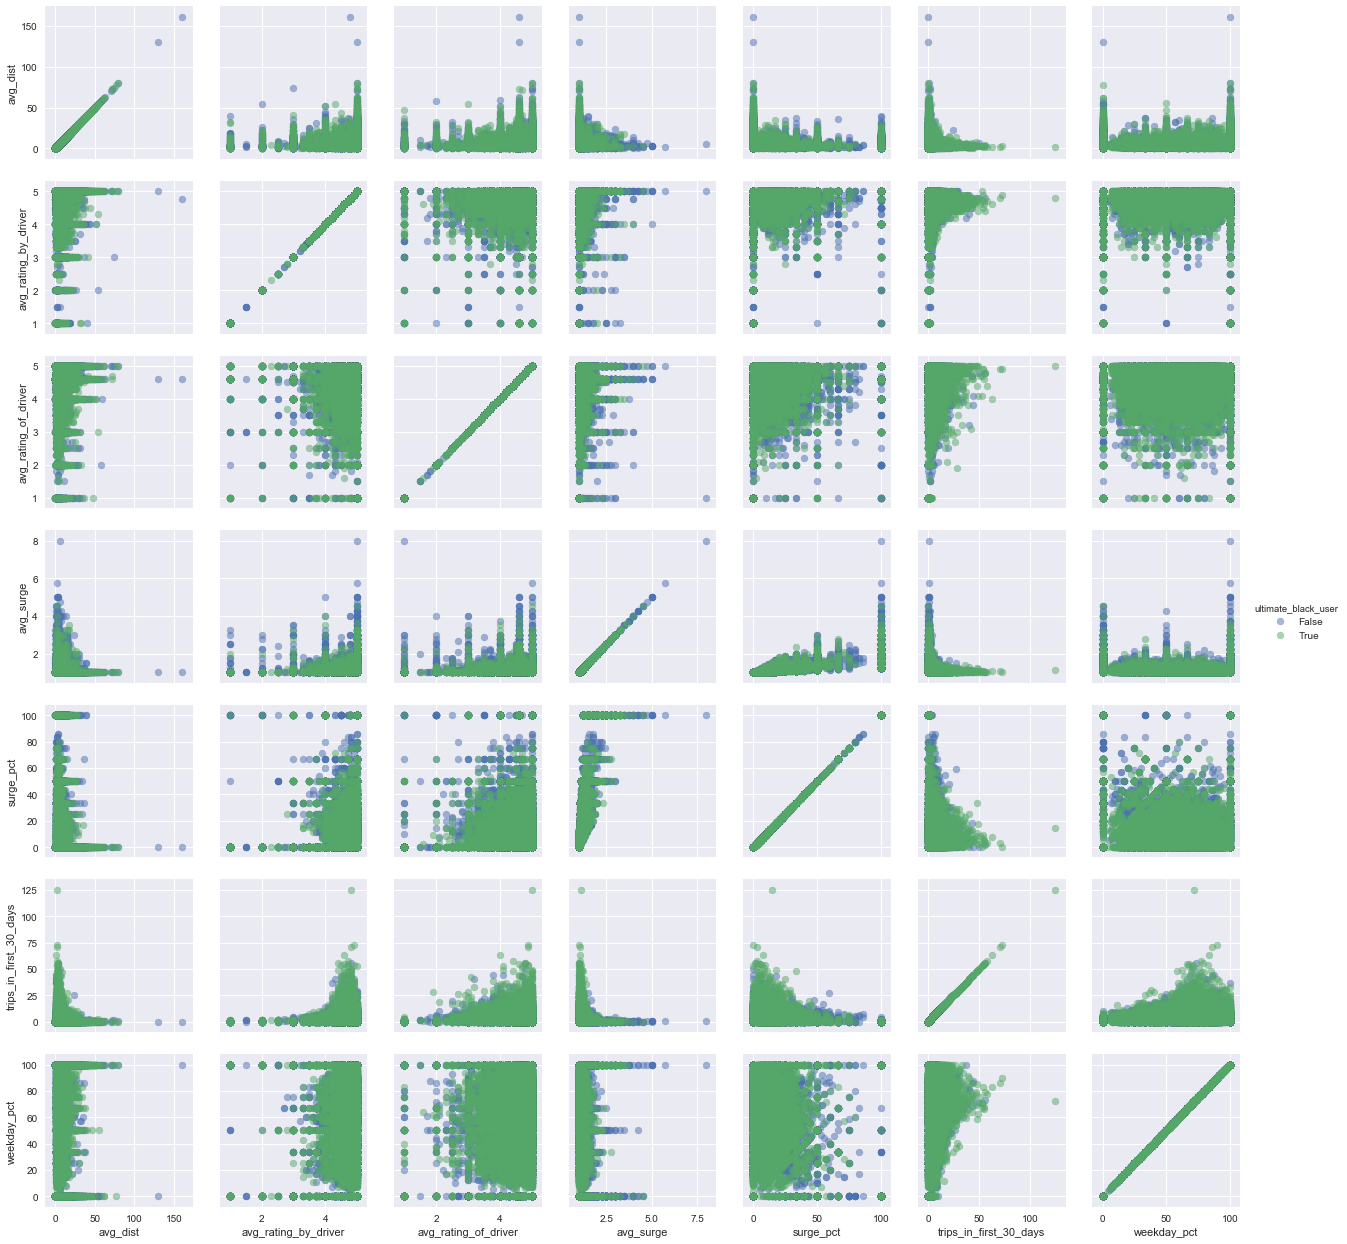

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

g = sns.PairGrid(ultimate_users, vars=['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver',
                                  'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct'],
            hue='ultimate_black_user')

g.map(plt.scatter, alpha=0.5)
g.add_legend()

plt.show()


I then plotted the counts for the categorical variables.  The greatest numbers of people were in Winterfell, but a greater proportion of the total number of people in King's Landing were retained users relative to those who were not.  

Most individuals (retained and otherwise) were also iPhone users, but a greater number of individuals with no phone were retained users.  


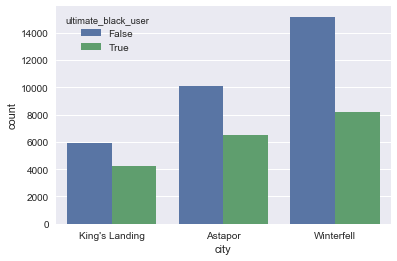

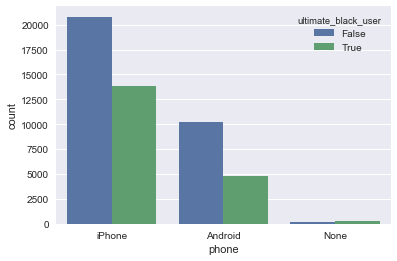

In [26]:
#Winterfell most common city in both retained and not retained
#iPhone is most common phone in both, but slightly more retained users have no phone

for i in ['city', 'phone']:
    sns.countplot(x=i, data=ultimate_users, hue='ultimate_black_user')
    plt.show()


I then plotted the distributions of each numerical variable for both retained and not retained users.  Most distributions for each numerical variable are the same for both retained and not retained. More retained users have lower surge levels (lower percentage of trips taken with a multiplier). More retained users took trips in the first 30 days. Greater numbers of not retained users do all (100%) or none (0%) of their traveling on weekdays. 20% to 85% of weekday travel is most common for retained users.  


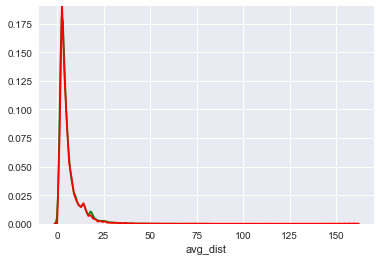

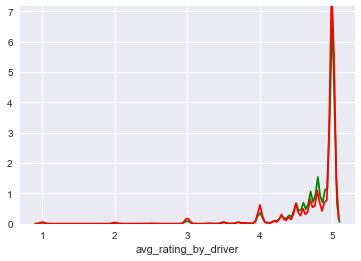

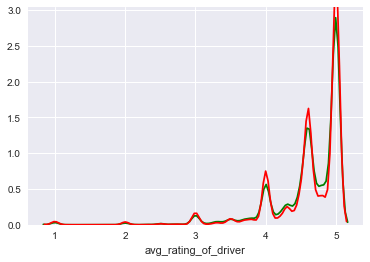

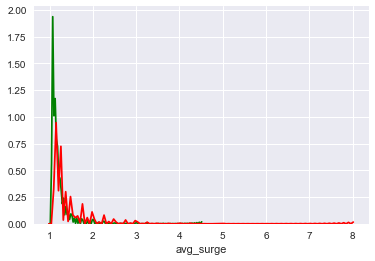

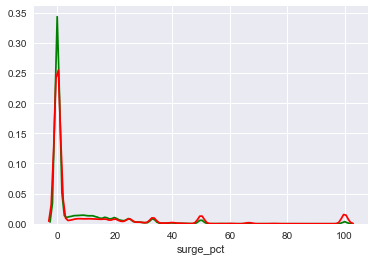

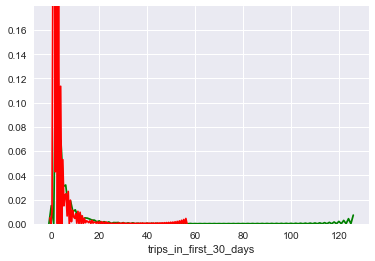

In [27]:
#Most distributions for each numerical variable are the same for both retained and not retained
#More retained users have lower surge levels (lower percentage of trips taken with a multiplier)
#More retained users took trips in the first 30 days

num_vars = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver',
                                  'avg_surge', 'surge_pct', 'trips_in_first_30_days']

for i in num_vars:
    sns.distplot(retained_users[i], color='green', hist=False, kde=True)
    sns.distplot(not_retained_users[i], color='red', hist=False, kde=True)
    plt.show()
    

In [28]:
#Greater numbers of not retained users do all (100%) or none (0%) of their traveling on weekdays

indices = retained_users['weekday_pct'].value_counts().index[0:10]

print(retained_users['weekday_pct'].value_counts()[indices], "\n")

n_indices = not_retained_users['weekday_pct'].value_counts().index[0:10]

print(not_retained_users['weekday_pct'].value_counts()[n_indices])



100.0    5713
0.0      2687
50.0     1425
66.7      774
33.3      584
75.0      453
60.0      325
25.0      277
80.0      247
40.0      233
Name: weekday_pct, dtype: int64 

100.0    10946
0.0       6516
50.0      2632
66.7      1314
33.3      1035
75.0       651
60.0       447
25.0       446
80.0       421
40.0       360
Name: weekday_pct, dtype: int64


In [29]:
percent_retained_all = (len(retained_users[retained_users['weekday_pct'] == 100])/len(retained_users)) * 100

percent_not_retained_all = (len(not_retained_users[not_retained_users['weekday_pct'] == 100])/len(not_retained_users)) * 100

print("Percent all weekday travel, retained: {:.2f} %".format(percent_retained_all))
print("Percent all weekday travel, not retained: {:.2f} %".format(percent_not_retained_all))

Percent all weekday travel, retained: 30.30 %
Percent all weekday travel, not retained: 35.14 %


In [30]:
percent_retained_none = (len(retained_users[retained_users['weekday_pct'] == 0])/len(retained_users)) * 100

percent_not_retained_none = (len(not_retained_users[not_retained_users['weekday_pct'] == 0])/len(not_retained_users)) * 100

print("Percent no weekday travel, retained: {:.2f} %".format(percent_retained_none))
print("Percent no weekday travel, not retained: {:.2f} %".format(percent_not_retained_none))

Percent no weekday travel, retained: 14.25 %
Percent no weekday travel, not retained: 20.92 %


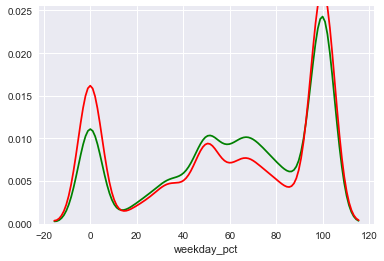

In [31]:
#Get greatest percentage of weekday travel for retained users
#20% to 85% weekday travel is most common for retained users

sns.distplot(retained_users['weekday_pct'], color='green', hist=False, kde=True)
sns.distplot(not_retained_users['weekday_pct'], color='red', hist=False, kde=True)
plt.show()    

I then analyzed the numbers and proportions of retained and not retained users that last traveled in a particular month.  Most traveled in June for both retained and not retained users, but a far greater percentage of retained users traveled in June than in any other month. Therefore this may still be a good month to look at as a time for greater efforts at retainining users, since there is such a large drop-off in travel in July.  

In [32]:
#Count numbers of months for last trips for retained users
retained_users_date = pd.Series([i.month for i in retained_users['last_trip_date']])

retained_users_date.value_counts()



6    9220
1    2921
5    2202
4    1460
3    1456
2    1318
7     277
dtype: int64

In [33]:
#Count numbers of months for last trips for not retained users
not_retained_users_date = pd.Series([i.month for i in not_retained_users['last_trip_date']])

not_retained_users_date.value_counts()

6    9036
1    7226
5    5383
4    3128
3    3112
2    2990
7     271
dtype: int64

In [34]:
#Show percentages for each month for last trips taken for retained and not retained users
last_trip_retained_percent = {}
last_trip_not_retained_percent = {}

print("Month   Percent \n")
for i, j in retained_users_date.value_counts().items():
    last_trip_retained_percent[i] = (j/len(retained_users_date)) * 100
    print("{:}:      {:.2f} %".format(i, last_trip_retained_percent[i]))

print("\n")
print("Month   Percent \n")

for i, j in not_retained_users_date.value_counts().items():
    last_trip_not_retained_percent[i] = (j/len(not_retained_users_date)) * 100
    print("{:}:      {:.2f} %".format(i, last_trip_not_retained_percent[i]))
    

Month   Percent 

6:      48.90 %
1:      15.49 %
5:      11.68 %
4:      7.74 %
3:      7.72 %
2:      6.99 %
7:      1.47 %


Month   Percent 

6:      29.01 %
1:      23.20 %
5:      17.28 %
4:      10.04 %
3:      9.99 %
2:      9.60 %
7:      0.87 %


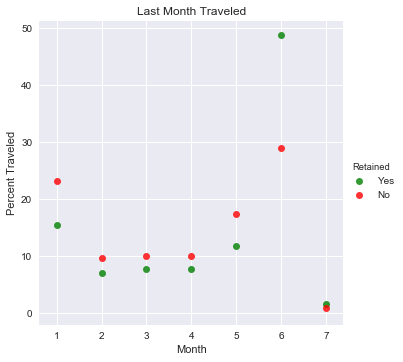

In [35]:
#Show distributions of percentages--Most traveled in June for both retained and not retained, but
# a far greater percentage of retained traveled in June than in any other month.  
#Therefore this may still be a good month to look at.  

plot_retained_month = pd.DataFrame.from_dict(last_trip_retained_percent, orient='index')
plot_not_retained_month = pd.DataFrame.from_dict(last_trip_not_retained_percent, orient='index')

plot_retained_month = plot_retained_month.reset_index()
plot_not_retained_month = plot_not_retained_month.reset_index()

plot_retained_month.columns=['Month', 'Percent']
plot_not_retained_month.columns=['Month', 'Percent']

plot_retained_month['Retained'] = "Yes"
plot_not_retained_month['Retained'] = "No"

plot_month = pd.concat([plot_retained_month, plot_not_retained_month])

_ = sns.lmplot('Month', 'Percent', data=plot_month, fit_reg=False, hue='Retained', palette=['green', 'red'])

_ = plt.ylabel("Percent Traveled")

_ = plt.title("Last Month Traveled")

plt.show()    


I then performed a similar analysis of signup times, but looking at days of the week rather than months, since all signups were in the month of January.  Fridays (5) and Saturdays (6) were the most common signup days for both groups of users (retained and not retained), with slightly more retained users signing up on Fridays. All values for both types of users were also very close, so ultimately the timing of the signups may not matter.  

  

In [36]:
#Check most significant signup day of week (all signups were in January)

#Count numbers of days of the week for signups for retained users
retained_signup_date = pd.Series([i.isoweekday() for i in retained_users['signup_date']])

print(retained_signup_date.value_counts())
print("\n")

#Count numbers of days of the week for signups for retained users
not_retained_signup_date = pd.Series([i.isoweekday() for i in not_retained_users['signup_date']])

print(not_retained_signup_date.value_counts())



5    3717
6    3582
4    2618
3    2605
7    2335
1    2003
2    1994
dtype: int64


6    6138
5    6050
4    4327
3    4083
7    4078
1    3340
2    3130
dtype: int64


In [37]:
#Show percentages for each weekday for signups for retained and not retained users
#All very close--slightly more retained on Friday
signup_retained_percent = {}
signup_not_retained_percent = {}

print("Weekday   Percent \n")
for i, j in retained_signup_date.value_counts().items():
    signup_retained_percent[i] = (j/len(retained_signup_date)) * 100
    print("{:}:      {:.2f} %".format(i, signup_retained_percent[i]))

print("\n")
print("Weekday   Percent \n")

for i, j in not_retained_signup_date.value_counts().items():
    signup_not_retained_percent[i] = (j/len(not_retained_signup_date)) * 100
    print("{:}:      {:.2f} %".format(i, signup_not_retained_percent[i]))
    

Weekday   Percent 

5:      19.71 %
6:      19.00 %
4:      13.89 %
3:      13.82 %
7:      12.38 %
1:      10.62 %
2:      10.58 %


Weekday   Percent 

6:      19.71 %
5:      19.42 %
4:      13.89 %
3:      13.11 %
7:      13.09 %
1:      10.72 %
2:      10.05 %


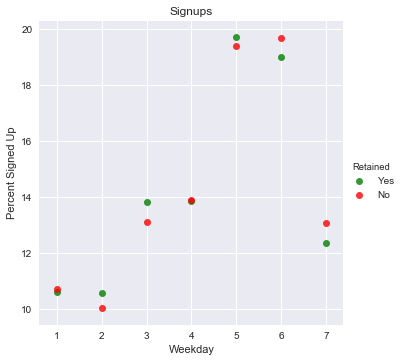

In [38]:
#Show distributions of percentages
#Also shows the percentages as very close for Friday and Saturday for retained and not retained users
#All other values are also very close, so ultimately the timing of signups may not matter

plot_retained_wday = pd.DataFrame.from_dict(signup_retained_percent, orient='index')
plot_not_retained_wday = pd.DataFrame.from_dict(signup_not_retained_percent, orient='index')

plot_retained_wday = plot_retained_wday.reset_index()
plot_not_retained_wday = plot_not_retained_wday.reset_index()

plot_retained_wday.columns=['Weekday', 'Percent']
plot_not_retained_wday.columns=['Weekday', 'Percent']

plot_retained_wday['Retained'] = "Yes"
plot_not_retained_wday['Retained'] = "No"

plot_wday = pd.concat([plot_retained_wday, plot_not_retained_wday])

_ = sns.lmplot('Weekday', 'Percent', data=plot_wday, fit_reg=False, hue='Retained', palette=['green', 'red'])

_ = plt.ylabel("Percent Signed Up")

_ = plt.title("Signups")

plt.show()  

### Machine Learning

#### Feature Engineering

Next, I prepared the data for machine learning.  First I created a features dataset, dropping the signup_date and avg_surge columns (avg_surge being too highly correlated with the surge percent variable).  I then scaled the numeric variables by subtracting their mean and dividing by the population standard deviation.  

In [39]:
#Scale the numerical data

user_cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver',
                                   'surge_pct', 'trips_in_first_30_days', 'weekday_pct']
features = ultimate_users.drop(['avg_surge', 'signup_date'], axis=1)

features[user_cols] = (features[user_cols] - features[user_cols].mean())/features[user_cols].std(ddof=0)


features.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,city,last_trip_date,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,-0.372650,0.497684,0.174240,King's Landing,2014-06-17,iPhone,0.328202,0.453984,True,-0.397131
1,0.431583,0.497684,0.705241,Astapor,2014-05-05,Android,-0.443394,-0.600689,False,-0.294653
2,-0.880771,0.497684,-0.533761,Astapor,2014-01-07,iPhone,-0.443394,0.190316,False,1.053741
3,-0.602181,0.273342,-0.002760,King's Landing,2014-06-29,iPhone,0.558679,1.772325,True,0.514383
4,-0.467266,0.273342,-0.356760,Winterfell,2014-03-15,Android,0.147829,3.090665,False,0.579106


Then, I created a month variable to indicate the month in which the last trip was taken.  From this column another binary column was taken to indicate whether or not the last month was in July (6 months out).  This variable 'target' was then separated out from the features dataframe to become the target variable.  I also created dummy variables for the city and phone categorical variables. Finally, I split the data into training and test sets using an 80%-20% split.  


In [40]:
# Create month variable for last trip and drop last_trip_date column

features['last_trip_month'] = pd.Series([i.month for i in features['last_trip_date']])
features = features.drop('last_trip_date', axis=1)

features.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_month
0,-0.372650,0.497684,0.174240,King's Landing,iPhone,0.328202,0.453984,True,-0.397131,6
1,0.431583,0.497684,0.705241,Astapor,Android,-0.443394,-0.600689,False,-0.294653,5
2,-0.880771,0.497684,-0.533761,Astapor,iPhone,-0.443394,0.190316,False,1.053741,1
3,-0.602181,0.273342,-0.002760,King's Landing,iPhone,0.558679,1.772325,True,0.514383,6
4,-0.467266,0.273342,-0.356760,Winterfell,Android,0.147829,3.090665,False,0.579106,3


In [41]:
#Create utility variable for use in creating target

features['target'] = pd.Series([1.0 if i == 7 else 0.0 for i in features['last_trip_month']])

features.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_month,target
0,-0.372650,0.497684,0.174240,King's Landing,iPhone,0.328202,0.453984,True,-0.397131,6,0.0
1,0.431583,0.497684,0.705241,Astapor,Android,-0.443394,-0.600689,False,-0.294653,5,0.0
2,-0.880771,0.497684,-0.533761,Astapor,iPhone,-0.443394,0.190316,False,1.053741,1,0.0
3,-0.602181,0.273342,-0.002760,King's Landing,iPhone,0.558679,1.772325,True,0.514383,6,0.0
4,-0.467266,0.273342,-0.356760,Winterfell,Android,0.147829,3.090665,False,0.579106,3,0.0


In [42]:
#Create dummy variables for city, phone and last_trip_month variables

features = pd.get_dummies(features, columns=['city', 'phone'], drop_first=True)

features.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_month,target,city_King's Landing,city_Winterfell,phone_None,phone_iPhone
0,-0.372650,0.497684,0.174240,0.328202,0.453984,True,-0.397131,6,0.0,1,0,0,1
1,0.431583,0.497684,0.705241,-0.443394,-0.600689,False,-0.294653,5,0.0,0,0,0,0
2,-0.880771,0.497684,-0.533761,-0.443394,0.190316,False,1.053741,1,0.0,0,0,0,1
3,-0.602181,0.273342,-0.002760,0.558679,1.772325,True,0.514383,6,0.0,1,0,0,1
4,-0.467266,0.273342,-0.356760,0.147829,3.090665,False,0.579106,3,0.0,0,1,0,0


In [43]:
#Create target variable

target = features['target']
target.value_counts()

0.0    49452
1.0      548
Name: target, dtype: int64

In [44]:
#Drop ultimate_black_user variable (too correlated with trip in first 30 days variable), last_month variable and target utility variables from features 

features = features.drop(['ultimate_black_user', 'last_trip_month', 'target'], axis=1)

features.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,trips_in_first_30_days,weekday_pct,city_King's Landing,city_Winterfell,phone_None,phone_iPhone
0,-0.372650,0.497684,0.174240,0.328202,0.453984,-0.397131,1,0,0,1
1,0.431583,0.497684,0.705241,-0.443394,-0.600689,-0.294653,0,0,0,0
2,-0.880771,0.497684,-0.533761,-0.443394,0.190316,1.053741,0,0,0,1
3,-0.602181,0.273342,-0.002760,0.558679,1.772325,0.514383,1,0,0,1
4,-0.467266,0.273342,-0.356760,0.147829,3.090665,0.579106,0,1,0,0


In [45]:
features = features.reset_index()
features = features.drop('index', axis=1)
features.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,trips_in_first_30_days,weekday_pct,city_King's Landing,city_Winterfell,phone_None,phone_iPhone
0,-0.372650,0.497684,0.174240,0.328202,0.453984,-0.397131,1,0,0,1
1,0.431583,0.497684,0.705241,-0.443394,-0.600689,-0.294653,0,0,0,0
2,-0.880771,0.497684,-0.533761,-0.443394,0.190316,1.053741,0,0,0,1
3,-0.602181,0.273342,-0.002760,0.558679,1.772325,0.514383,1,0,0,1
4,-0.467266,0.273342,-0.356760,0.147829,3.090665,0.579106,0,1,0,0


In [46]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



#### Logistic Regression

I initially attempted to use a logistic regression model, but due to the imbalanced data (548 1's compared to 49452 0's in the target variable), the model only predicted the zero values.  The accuracy on the test data was over 99%, but the individual recall on the 1's was zero.  This model was therefore rejected.  

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

print("Accuracy: {:}".format(logreg.score(X_test, y_test)))


Accuracy: 0.9905


In [48]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

#Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[9905    1]
 [  94    0]]
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      9906
        1.0       0.00      0.00      0.00        94

avg / total       0.98      0.99      0.99     10000



#### Random Forest

I then attempted to use a random forest model in the hopes that the random ensembling may help compensate for the imbalanced data, as I did not wish to attempt oversampling since that effectively alters the dataset itself.  However, I got similar results as I got for the logistic regression model:  a model that only successfully predicts zero values in the target variable.  Attempting to use balanced class weights made no difference.  I therefore rejected the random forest model as well.  

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [50]:
#Print accuracy of random forest
print("Accuracy: {:.2f} %".format(rfc.score(X_test, y_test) * 100))

Accuracy: 99.05 %


In [51]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels of the test set: y_pred
y_pred = rfc.predict(X_test)

#Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[9905    1]
 [  94    0]]
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      9906
        1.0       0.00      0.00      0.00        94

avg / total       0.98      0.99      0.99     10000



#### Support Vector Machine

Finally, I attempted to use a support vector machine classifier since I knew that it could weight the data in a balanced way to set class weights inversely proportional to class frequencies, as did the random forest model, but it also uses a penalty term C with the class weights.  This provided more realistic results.  Initially I got an accuracy of 70% and ultimately obtained an accuracy of 71.47% by increasing the C value to 3.  

Although the precision for the positive target class was still low (a lot of false positive predictions were apparently being made), the recall for the positive target class was substantially higher at .72, thus showing a much higher level of prediction for the positive target class out of the total number of actual postives present.  I therefore considered this model to be successful given the imbalanced data and deemed oversampling to be unnecessary here.  

Finally, solely for the purpose of identifying the most important features, I re-ran the same model using a linear kernel which gives access to the feature coefficients.  The most important feature was city_King's Landing, followed by phone/i_Phone use, city_Winterfell, weekday_pct and trips_in_first_30_days. Avg_dist had a strong inverse level of importance as well.  

In [52]:
from sklearn.svm import SVC

clf = SVC(class_weight='balanced', random_state=42, C=3)

clf.fit(X_train, y_train)



SVC(C=3, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
#Print accuracy of SVM
print("Accuracy: {:.2f} %".format(clf.score(X_test, y_test) * 100))

Accuracy: 71.47 %


In [54]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)

#Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[7079 2827]
 [  26   68]]
             precision    recall  f1-score   support

        0.0       1.00      0.71      0.83      9906
        1.0       0.02      0.72      0.05        94

avg / total       0.99      0.71      0.82     10000



In [55]:
#Use linear kernel in this instance solely to get coefficients for feature importances 
from sklearn.svm import SVC

clf2 = SVC(class_weight='balanced', random_state=42, kernel='linear', C=3)

clf2.fit(X_train, y_train)



SVC(C=3, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
#Get coefficients as measure of feature importances

coefs = zip(features.columns, clf2.coef_[:][0])
ranks = {}
for i, j in coefs:
    ranks[i] = j
    print("Feature: {:}, Coefficient: {:.4f}".format(i, ranks[i]))

best_feature = list(ranks.keys())[list(ranks.values()).index(max(list(ranks.values())))]
print("\n")
print("Best feature: {:}".format(best_feature))



Feature: avg_dist, Coefficient: -0.4908
Feature: avg_rating_by_driver, Coefficient: -0.0225
Feature: avg_rating_of_driver, Coefficient: 0.0254
Feature: surge_pct, Coefficient: 0.1354
Feature: trips_in_first_30_days, Coefficient: 0.4433
Feature: weekday_pct, Coefficient: 0.4459
Feature: city_King's Landing, Coefficient: 1.3839
Feature: city_Winterfell, Coefficient: 0.6338
Feature: phone_None, Coefficient: 0.6794
Feature: phone_iPhone, Coefficient: 0.9260


Best feature: city_King's Landing


### Conclusion

Based on the foregoing, it therefore appears that King's Landing, and to a lesser extent Winterfell, are the best cities to target for long term customer retention.  Both iPhone users and those with no phone should also be targeted.  Although the percentage of trips taken during a weekday is an important predictive factor in determining long term activity, this percentage should be in the key range of approximately 20%-85% of weekday travel.  Those who travel more or less than this period of time during the week were typically not enthusiastic adopters who took Ultimate Black trips within the first 30 days of signing up.  Finally, it appears that those who traveled shorter distances were more likely to be long term users.  

Therefore one possible strategy would be to focus more on marketing toward these types of users.  Conversely, another possible (perhaps more challenging) strategy would be to increase outreach efforts toward those individuals not in these categories in order to increase retention numbers among them.  